In [70]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [71]:
# Assuming a simple linear relationship between Age and Salary for the purpose of data generation
np.random.seed(0)
ages = np.random.randint(20, 60, size=95)
salaries = 50 + (ages - 20) * 0.5 + np.random.normal(0, 3, size=95)

# Creating a DataFrame for the additional data
df = pd.DataFrame({'Age': ages, 'Salary': salaries})
df.describe()

,Age,Salary
count,95.00000,95.000000
mean,38.80000,59.246119
std,12.65382,6.997594
min,20.00000,44.378857
25%,28.50000,53.288310
50%,38.00000,59.780838
75%,51.00000,64.702080
max,59.00000,73.986787


One-Sample T-Test

In [72]:
# Hypothesis testing: One-sample T-test
# Null hypothesis: Mean is 2.0
t_statistic, p_value = stats.ttest_1samp(df['Age'], 20)

print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: 14.480982055385683
p-value: 1.134543505651711e-25


Two-sample T-test

In [73]:
t_statistic, p_value = stats.ttest_ind(df['Age'], df['Salary'])  # whether significant difference between the means of two independent samples
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -13.781952934255614
p-value: 2.5368813835730025e-30


In [74]:
# Calculate Pearson correlation coefficient
correlation_coef = np.corrcoef(df['Age'], df['Salary'])
correlation_coef

array([[1.        , 0.90830921],
       [0.90830921, 1.        ]])

Linear Regression

In [75]:
# Initialize the linear regression model
X = df[['Age']]  # Features (2D array for scikit-learn)
y = df['Salary']  # Target variable

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [76]:
# Accessing and printing the model's parameters
print("Model Coefficients (Slope):", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients (Slope): [0.50229725]
Model Intercept: 39.756985477143445


In [77]:
# Perform 3-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=3)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))  # larger, better

Cross-validation scores: [0.81229166 0.77506605 0.86199184]
Mean cross-validation score: 0.8164498523157393


Make Predictions

In [78]:
# Predictions
y_pred = model.predict(X)

Evaluate the Model

In [79]:
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8250256256373926


In [80]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Squared Error: {mse}') # larger, worse
print(f'Mean Absolute Error: {mae}') # larger, worse

Mean Squared Error: 8.477662835467218
Mean Absolute Error: 2.2752802974232265


Visualization (Actual vs Predicted Values)

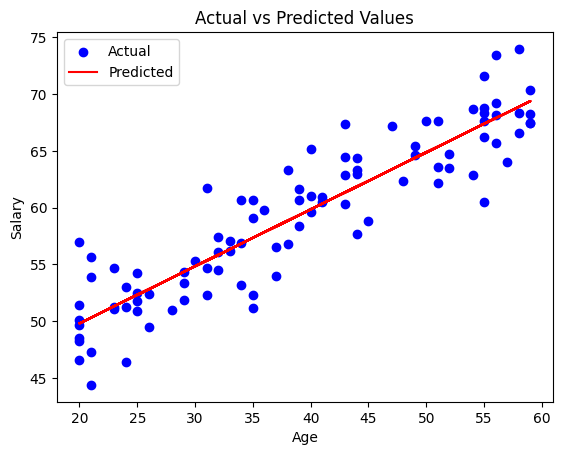

In [81]:
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()